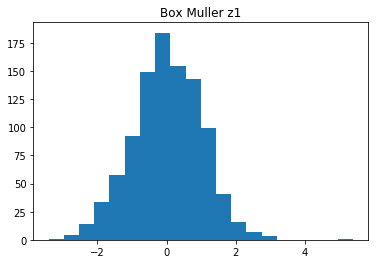

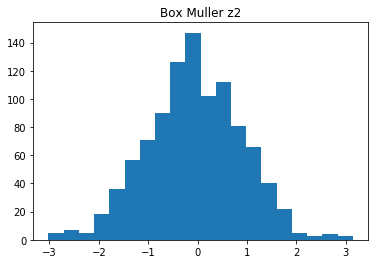

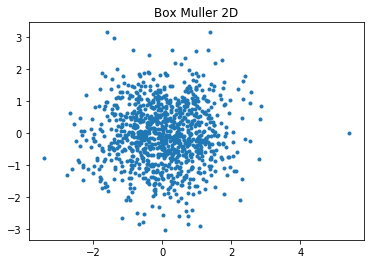

In [1]:
#generador de congruencia lineal
#sea:
# a : multiplicador
# b : incremento
# m : modulo
# entonces X_i = a*X_(i-1)+ b mod (m)

# tal que m y b son primos entre si.
# Si q es un numero primo que divide a m, entonces q divide a a - 1.
# Si 4 divide a m, entonces 4 divide a a - 1.


import numpy as np
import math
semilla = 1024
n = 1000 #muestra
a   = 7**5
b   = 630360016
m   = 2**31-1
#funcion para generar numeros aleatorios con distribucion uniforme
def pseudoaleatorio(semilla):
    x = np.ones(n)
    x[0]    =   semilla
    for i in range(len(x)-1):
        x[i+1]    =  ( a*x[i] + b ) %   m
    return x
x_i=[] #lista de listas de valores aleatorios uniformes
for i in range(n):
    x_i.append(pseudoaleatorio(semilla+i))

#Procedemos a transformar cada valor obtenido para la semilla a una distribucion uniforme con valores entre [0 - 1]
#dividiendo a todos los valores entre m

def uniformizarPseudoaleatorios(x,n):
    U = np.zeros((n,), dtype=float)
    for i in range(n):
        U[i]=float(x[i]/m)
    return U

u_i=[] #lista de listas de valores aleatorios uniformes
for i in range(n):
    u_i.append(uniformizarPseudoaleatorios(x_i[i],n))

#print ("pseudoaleatorios con distribucion uniforme:",np.array(x_i[1]))
#print ("\ndistribucion transformada al rango [0-1]:",np.array(u_i[0]))
# para transformar nuestro generador de numeros aleatorios en una distribucion aleatoria normal
# por el teorema del limite central sea S = sumatoria de Ui

PI=3.1415926

def BoxMuller(U,V):
    z1 = np.zeros((n,), dtype=float)
    z2 = np.zeros((n,), dtype=float)
    for i in range(n):
        if U[i] != 0 and V[i] !=0:
            z1[i] = math.sqrt(-2*math.log(U[i]))*math.cos(2*PI*V[i])
            z2[i] = math.sqrt(-2*math.log(U[i]))*math.sin(2*PI*V[i])
    return (z1,z2)


z1,z2 = BoxMuller(u_i[0],u_i[1])

#print (z1)
#print (z2)
import matplotlib.pyplot as plt
%matplotlib inline

cuenta,cajas,ignorar = plt.hist(z1,20)
plt.title('Box Muller z1')
plt.savefig("z1.png")
plt.show()

cuenta,cajas,ignorar = plt.hist(z2,20)
plt.title('Box Muller z2')
plt.savefig("z2.png")
plt.show()

plt.plot(z1,z2,'.')
plt.title('Box Muller 2D')
plt.savefig("bivariada.png")
plt.show()